In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df.replace({'No internet service':'No','No phone service':'No'},inplace=True)

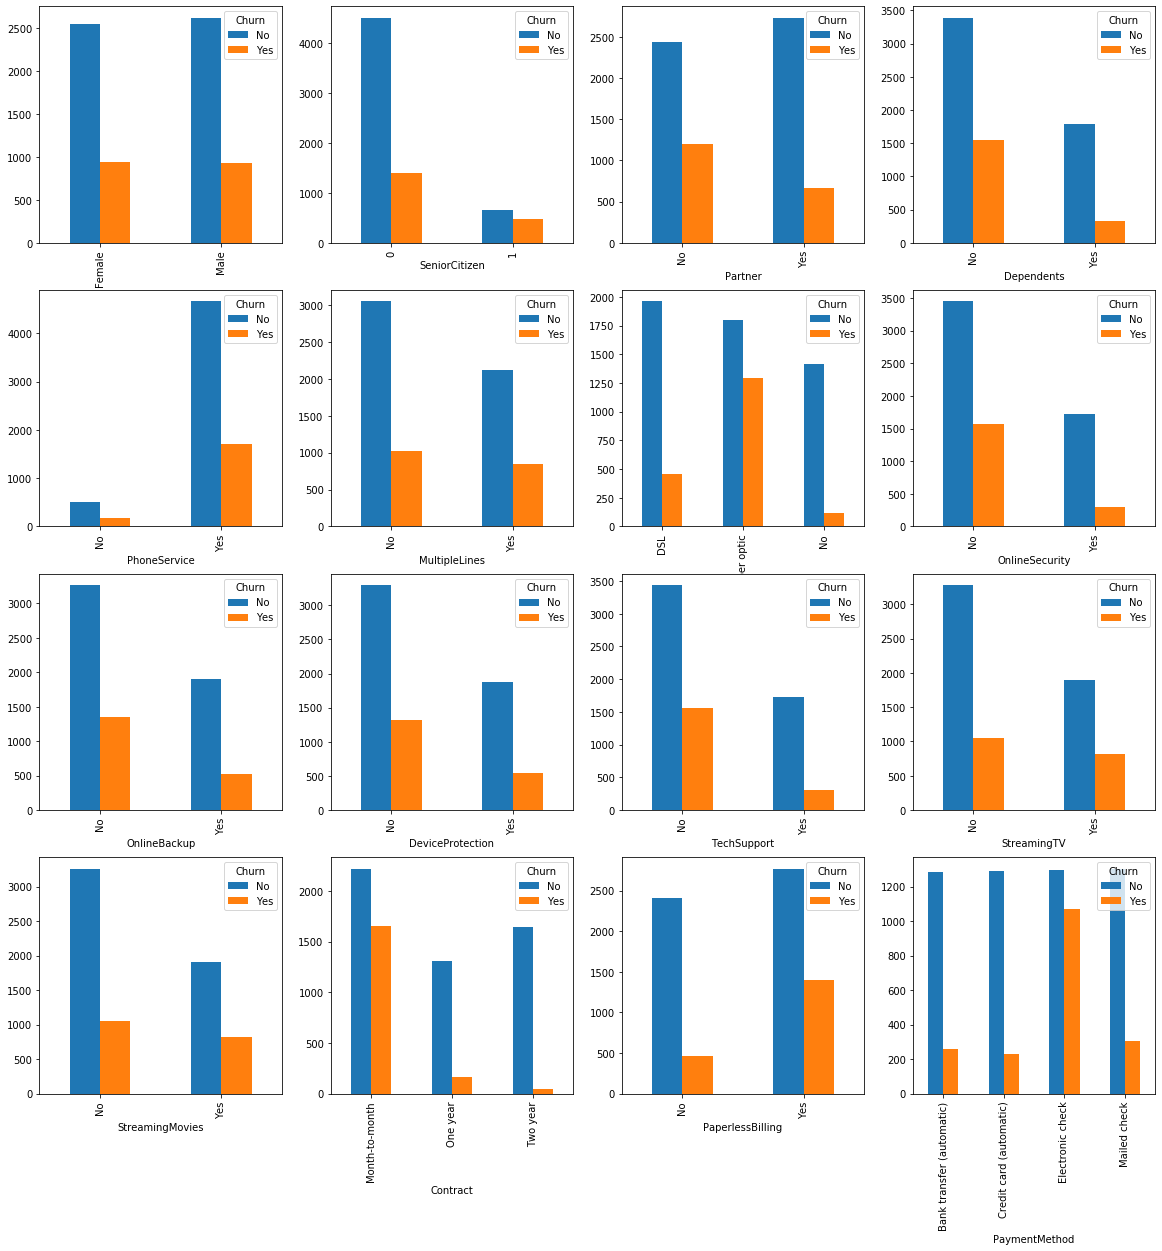

In [6]:
xs = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
      'PaymentMethod', 'TotalCharges']

row, col = 4, 4
g = 0
y = 'Churn'

fig, axs = plt.subplots(row, col, figsize=(20, 20))
for rw in range(row):
    for cl in range(col):
        pd.crosstab(df[xs[g]], df.Churn).plot(kind='bar', ax=axs[rw, cl])
        plt.xlabel(xs[g])
        g += 1

plt.show()


In [18]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

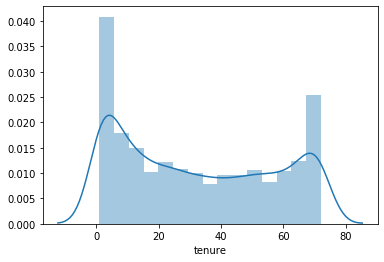

In [88]:
sns.distplot(df.tenure)
plt.show()

In [64]:
df = df[df.TotalCharges != ' ']

In [65]:
df.shape

(7032, 21)

In [66]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [79]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# cat_cols = cat_cols.remove('customerID')
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [80]:
def OHE(df, cols):
    
    c2,c3 = [],{}
    for c in cols[1:]:
        if df[c].nunique()>1 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df,columns=c2,drop_first=True,prefix=c3)
    print(df.shape)
    return df

In [81]:
train1=OHE(df,cat_cols)

(7032, 25)


In [83]:
train1.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ohe_gender_Male,ohe_Partner_Yes,ohe_Dependents_Yes,ohe_PhoneService_Yes,ohe_MultipleLines_Yes,...,ohe_TechSupport_Yes,ohe_StreamingTV_Yes,ohe_StreamingMovies_Yes,ohe_Contract_One year,ohe_Contract_Two year,ohe_PaperlessBilling_Yes,ohe_PaymentMethod_Credit card (automatic),ohe_PaymentMethod_Electronic check,ohe_PaymentMethod_Mailed check,ohe_Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [89]:
from sklearn.preprocessing import MinMaxScaler


In [90]:
scaler=MinMaxScaler()
train1.MonthlyCharges = scaler.fit_transform(train1.MonthlyCharges.values.reshape(-1, 1))
train1.TotalCharges = scaler.fit_transform(train1.TotalCharges.values.reshape(-1, 1))
train1.tenure = scaler.fit_transform(train1.tenure.values.reshape(-1, 1))


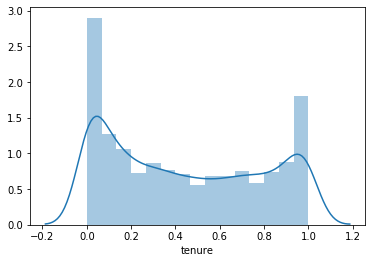

In [97]:
sns.distplot(train1.tenure)

In [ ]:
# build Logistic Regression model 
model_lr = LogisticRegression(random_state=0, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores_lr = cross_val_score(model_lr, X.iloc[:,1:],y , scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean Roc_Auc lr:{}'.format(np.mean(scores_lr)))

In [98]:
test.head()

NameError: name 'test' is not defined